In [1]:
import tensorflow as tf
from DRAWCell import DRAWCell
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = np.round(x_train)
x_test = np.round(x_test)

In [3]:
img_height, img_width = x_train[0].shape

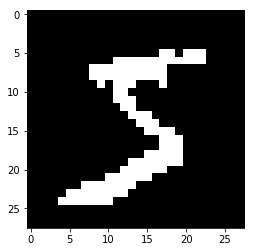

In [4]:
plt.imshow(x_train[0], cmap='gray')

In [5]:
# Training the standard-sized DRAW model on 28x28 mnist takes a couple of days... on a gpu.
# we are gonna downsample the images to speed things up.

resize_ratio = 0.5
img_width = int(resize_ratio * img_width)
img_height = int(resize_ratio * img_height)

In [6]:
# to further expedite training, we are using smaller rnns, a smaller z dim, and fewer timesteps
draw_cell = DRAWCell(
    img_width=img_width, 
    img_height=img_height, 
    img_channels=1, 
    enc_dim=128, 
    z_dim=16, 
    dec_dim=128, 
    read_dim=2, 
    write_dim=2,
    num_timesteps=16)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [7]:
init_op = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init_op)

In [ ]:
num_training_steps = 10000
batch_size = 100

num_epochs = num_training_steps // (x_train.shape[0] // batch_size)

for epoch in range(0,num_epochs):
    for idx in range(0, x_train.shape[0], batch_size):
        batch = x_train[idx:(idx+batch_size), :, :]
        imgs = [np.expand_dims(scipy.ndimage.zoom(img, zoom=resize_ratio), 2) \
                for img in batch]
        imgs = np.array(imgs)
        elbo = draw_cell.train(sess, imgs)
        if idx == 0 or (idx >= 1000 and (idx % 1000 == 0)):
            print('Epoch {}, idx {}..... ELBO: {}'.format(epoch, idx, elbo))

Epoch 0, idx 0..... ELBO: -135.95986938476562
Epoch 0, idx 1000..... ELBO: -135.10984802246094
Epoch 0, idx 2000..... ELBO: -134.419189453125
Epoch 0, idx 3000..... ELBO: -133.65487670898438
Epoch 0, idx 4000..... ELBO: -132.98118591308594
Epoch 0, idx 5000..... ELBO: -132.2962646484375
Epoch 0, idx 6000..... ELBO: -131.77444458007812
Epoch 0, idx 7000..... ELBO: -130.79156494140625
Epoch 0, idx 8000..... ELBO: -130.33883666992188
Epoch 0, idx 9000..... ELBO: -129.47622680664062
Epoch 0, idx 10000..... ELBO: -128.88658142089844
Epoch 0, idx 11000..... ELBO: -128.34078979492188
Epoch 0, idx 12000..... ELBO: -127.5511245727539
Epoch 0, idx 13000..... ELBO: -127.2519760131836
Epoch 0, idx 14000..... ELBO: -126.5036849975586
Epoch 0, idx 15000..... ELBO: -125.40997314453125
Epoch 0, idx 16000..... ELBO: -124.8956527709961
Epoch 0, idx 17000..... ELBO: -124.05233764648438
Epoch 0, idx 18000..... ELBO: -123.37455749511719
Epoch 0, idx 19000..... ELBO: -122.69026184082031
Epoch 0, idx 20000..

Epoch 2, idx 48000..... ELBO: -73.38188171386719
Epoch 2, idx 49000..... ELBO: -70.9583969116211
Epoch 2, idx 50000..... ELBO: -70.40841674804688
Epoch 2, idx 51000..... ELBO: -70.10037231445312
Epoch 2, idx 52000..... ELBO: -70.02356719970703
Epoch 2, idx 53000..... ELBO: -72.3163070678711
Epoch 2, idx 54000..... ELBO: -71.93698120117188
Epoch 2, idx 55000..... ELBO: -71.63545989990234
Epoch 2, idx 56000..... ELBO: -70.65596008300781
Epoch 2, idx 57000..... ELBO: -68.08026885986328
Epoch 2, idx 58000..... ELBO: -69.50382995605469
Epoch 2, idx 59000..... ELBO: -70.24187469482422
Epoch 3, idx 0..... ELBO: -69.40607452392578
Epoch 3, idx 1000..... ELBO: -68.54664611816406
Epoch 3, idx 2000..... ELBO: -70.3348388671875
Epoch 3, idx 3000..... ELBO: -69.41114044189453
Epoch 3, idx 4000..... ELBO: -70.27709197998047
Epoch 3, idx 5000..... ELBO: -70.38391876220703
Epoch 3, idx 6000..... ELBO: -72.7859115600586
Epoch 3, idx 7000..... ELBO: -68.58869934082031
Epoch 3, idx 8000..... ELBO: -71.48

Epoch 5, idx 36000..... ELBO: -53.24958419799805
Epoch 5, idx 37000..... ELBO: -56.4495849609375
Epoch 5, idx 38000..... ELBO: -53.44630432128906
Epoch 5, idx 39000..... ELBO: -55.83189392089844
Epoch 5, idx 40000..... ELBO: -55.95634460449219
Epoch 5, idx 41000..... ELBO: -55.243099212646484
Epoch 5, idx 42000..... ELBO: -56.69148254394531
Epoch 5, idx 43000..... ELBO: -53.231178283691406
Epoch 5, idx 44000..... ELBO: -56.474998474121094
Epoch 5, idx 45000..... ELBO: -55.20002365112305
Epoch 5, idx 46000..... ELBO: -54.014583587646484
Epoch 5, idx 47000..... ELBO: -55.70676803588867
Epoch 5, idx 48000..... ELBO: -56.950565338134766
Epoch 5, idx 49000..... ELBO: -54.26492691040039
Epoch 5, idx 50000..... ELBO: -53.541046142578125
Epoch 5, idx 51000..... ELBO: -53.122310638427734
Epoch 5, idx 52000..... ELBO: -53.79731750488281
Epoch 5, idx 53000..... ELBO: -56.5053596496582
Epoch 5, idx 54000..... ELBO: -56.4916877746582
Epoch 5, idx 55000..... ELBO: -56.3065071105957
Epoch 5, idx 5600

Epoch 8, idx 24000..... ELBO: -49.08671569824219
Epoch 8, idx 25000..... ELBO: -50.45929718017578
Epoch 8, idx 26000..... ELBO: -51.145530700683594
Epoch 8, idx 27000..... ELBO: -51.04391098022461
Epoch 8, idx 28000..... ELBO: -50.577919006347656
Epoch 8, idx 29000..... ELBO: -50.82244110107422
Epoch 8, idx 30000..... ELBO: -51.71266174316406
Epoch 8, idx 31000..... ELBO: -50.558685302734375
Epoch 8, idx 32000..... ELBO: -50.57294845581055
Epoch 8, idx 33000..... ELBO: -53.59685134887695
Epoch 8, idx 34000..... ELBO: -49.86457824707031
Epoch 8, idx 35000..... ELBO: -51.48268127441406
Epoch 8, idx 36000..... ELBO: -47.659027099609375
Epoch 8, idx 37000..... ELBO: -50.97007369995117
Epoch 8, idx 38000..... ELBO: -47.879981994628906
Epoch 8, idx 39000..... ELBO: -50.40080261230469
Epoch 8, idx 40000..... ELBO: -50.510562896728516
Epoch 8, idx 41000..... ELBO: -49.880470275878906
Epoch 8, idx 42000..... ELBO: -51.32821273803711
Epoch 8, idx 43000..... ELBO: -47.8593864440918
Epoch 8, idx 4

In [14]:
output_sequence = draw_cell.sample(sess, num_imgs=8)

In [ ]:
output_sequence[0]

In [20]:
list_ = []
for i in range(0,draw_cell.num_timesteps):
    img = output_sequence[:,i,:,:,:]
    list_.append(img)
    
sequences = np.concatenate(list_, axis=2)

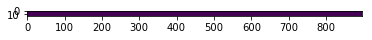

In [21]:
plt.imshow(sequences[0,:,:,0])